# 读取 UCI Statlog (Australian Credit Approval)数据集，使用 k-最近邻算法进行缺失值填充，计算自变量（各属性）的填充性能，进行RMSE分析

2023年5月29日

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import random

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

In [ ]:
"Statlog (Australian Credit Approval)" 是UCI（加州大学欧文分校机器学习数据集库）中的一个公开数据集。
这个数据集来源于一个现实的金融场景，主要用于预测某人申请信用卡是否会被批准。

以下是这个数据集的一些基本信息：
实例数量：690
属性数量：14（包括一个目标属性，用于指示信用卡申请是否被批准）
特性：多元/二元属性
关于每个属性的具体内容和类型，根据数据集的描述，所有的属性都已经被处理为数值形式，以保护申请人的隐私。
实际的属性类型和意义并未公开。
目标属性是二元的，一个类别表示信用卡申请被批准，另一个类别表示申请被拒绝。
A15: 1(+) , 2(-)  (formerly: +,-)
每个属性的基本描述：
A1: 分类型变量, 可取值'1', '0' (formerly: a,b)
A2: 连续型变量
A3: 连续型变量
A4: 分类型变量, 可取值'1', '2', '3' (formerly: p,g,gg)
A5: 分类型变量, 可取值'1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14' (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)
A6: 分类型变量, 可取值'1', '2', '3', '4', '5', '6', '7', '8', '9' (formerly: ff,dd,j,bb,v,n,o,h,z)
A7: 连续型变量
A8: 分类型变量, 可取值'1', '0' (formerly: t, f)
A9: 分类型变量, 可取值'1', '0' (formerly: t, f)
A10: 分类型变量, 可取值'1', '0'  (formerly t, f)
A11: 连续型变量
A12: 分类型变量, 可取值'1', '0', '2' (formerly: s, g, p)
A13: 连续型变量
A14: 连续型变量

包含14个属性,每个属性的可能含义如下:

    
1. A1:夫妻年龄:借款人与配偶的年龄。
2. A2:子女数量:借款人的子女数量。
3. A3:家庭住房情况:家庭住房面积,分为有房、公寓或无房三种情况。
4. A4:夫妻工作岗位:借款人与配偶的工作岗位,如管理层、白领或蓝领等。
5. A5:家庭财产:家庭资产与负债情况,分为富足、一般或贫困三种情况。
6. A6: 家庭收入:家庭年收入情况,分为高、中或低三个级别。
7. A7: 职业年限:借款人在现工作岗位的工作年限。
8. A8: 现居住时间:借款人在现居住地的居住年限。 
9. A9: 以往信贷情况:借款人以往的信贷记录,分为无违约、一次违约或多次违约。
10. A10: 现有贷款数:借款人现有的贷款数量,用于衡量还款负担。
11. A11: 信贷额度:申请的信贷金额。
12. A12: 还款期限:信贷的还款年限。
13. A13: 借款目的:信贷资金的使用目的,分为消费、商业或住房三种类型。 
14. A14: 贷款人联系方式:贷款申请是否提供联系人信息,以判断申请的真实性。

- Age:年龄
- Sex:性别
- Income:年收入
- Assets:资产
- Debt:负债
- TimeEmployed:工作时间
- MaritalStatus:婚姻状况 
- PostCode:邮政编码(代理住房价值)
- RiskRating:风险评分
- NumberExistingCredits:现有信贷数量
- TypeOfExistingCredit:现有信贷类型
-  PurposeOfNewCredit:新申请信贷目的 
- CreditAmount:申请信贷金额
- ValueOfCollateral:抵押品价值

In [2]:
# 读取数据集
#column_names = ['feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6', 'feat7', 'feat8', 'feat9', 'feat10', 'Output']
australian_df = pd.read_csv('australian.data',header=None, sep=' ')  #  names=column_names,,  \s+ ,nrows=100, usecols=range(10000)

"""
header=0 : 表示CSV文件第一行是列名,将第一个行作为列名读取
header=1 : 表示CSV文件的第二行是列名,将第二行作为列名读取,跳过第一个行
header=None : 表示CSV文件没有列名行,将默认的'col1','col2'等作为列名
"""

"\nheader=0 : 表示CSV文件第一行是列名,将第一个行作为列名读取\nheader=1 : 表示CSV文件的第二行是列名,将第二行作为列名读取,跳过第一个行\nheader=None : 表示CSV文件没有列名行,将默认的'col1','col2'等作为列名\n"

In [6]:
australian_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
具体流程是:
1. 读取数据到australian_df,拷贝原始真实值为australian_df_origin
2. 将australian_df划分为train_df和test_df,拷贝原始真实值为train_df_origin和test_df_origin
3. 随机在train_df和test_df中产生10%的缺失值
4. 使用KNN在X_train中填充缺失值,并fit knn_imputer模型，调整K值 
5. 使用knn_imputer在X_test_scaled中填充缺失值 
6. 计算填充后test_imputed与标准化后真实值test_df_origin的MSE

In [7]:
australian_df_origin = australian_df.copy()

In [8]:
australian_df_origin.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [8]:
#le = LabelEncoder()
#for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    #adult_df[col] = le.fit_transform(adult_df[col])

In [18]:
#adult_df

In [17]:
# 可视化缺失值
#msno.matrix(YachtHydrodynamics_df_origin)

X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]
 df.iloc[:, :-1] 用于取出除最后一列之外的所有特征数据,df.iloc[:, -1] 用于取出最后一列的标签数据。

In [3]:
#1. 将数据集划分为训练集和测试集
#random_state 的取值通常为整数,不同的整数会产生不同的随机结果,而相同的整数会产生相同的随机结果,实现可重复性
#X_train, X_test, y_train, y_test = train_test_split(abalone_df.iloc[:, :-1],abalone_df.iloc[:, -1],test_size=0.2,random_state=1)
train_df, test_df = train_test_split(australian_df,test_size=0.2,random_state=42)


In [4]:
train_df_origin = train_df.copy()
test_df_origin = test_df.copy()

In [5]:
# 2. 在训练集中随机产生10%的数据缺失
missing_rate = 0.1
np.random.seed(0) 
ixt = [(row, col) for row in range(train_df.shape[0]) for col in range(train_df.shape[1])]

for row, col in random.sample(ixt, int(round(missing_rate*len(ixt)))):
    train_df.iat[row, col] = np.nan

In [12]:
print('train_df.shape[0]=',train_df.shape[0])
print('train_df.shape[1]=',train_df.shape[1])
print('row=',row)
print('col=',col)
print('len(ixt)=',len(ixt))

train_df.shape[0]= 552
train_df.shape[1]= 15
row= 331
col= 9
len(ixt)= 8280


<AxesSubplot:>

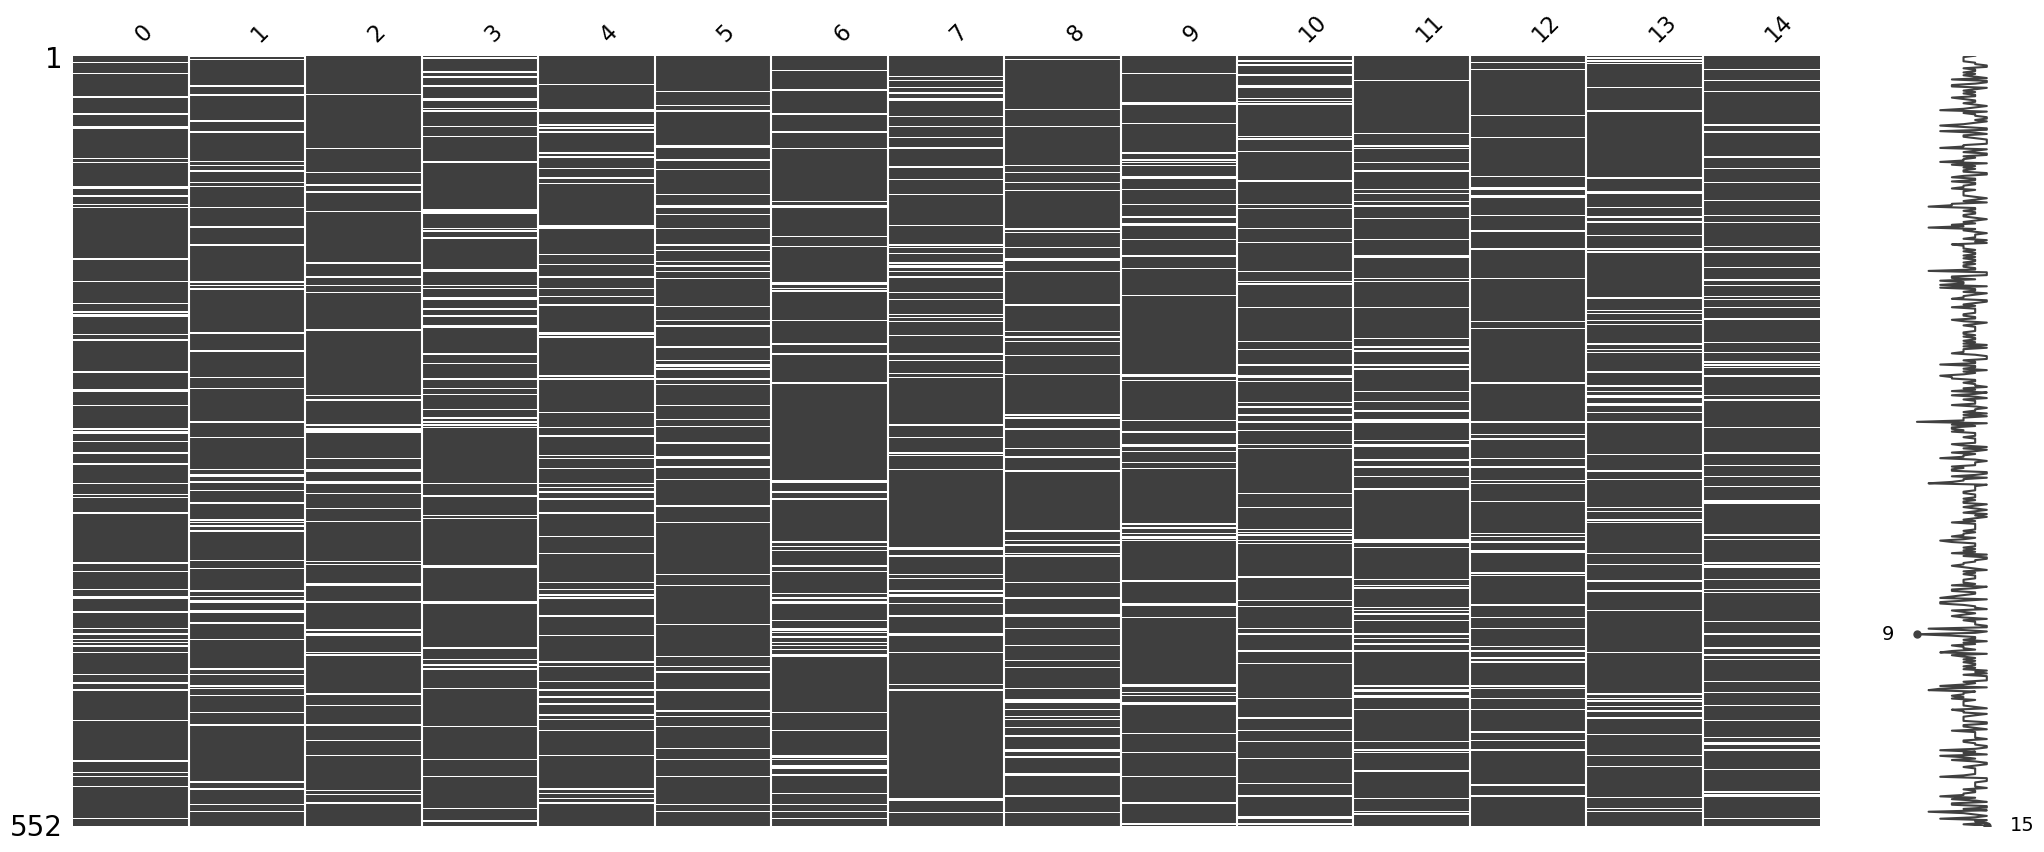

In [6]:
# 可视化缺失值
msno.matrix(train_df)

In [7]:
# 3. 在测试集中随机产生10%的数据缺失
np.random.seed(0) 
missing_rate = 0.1
ixtest = [(row, col) for row in range(test_df.shape[0]) for col in range(test_df.shape[1])]
for row, col in random.sample(ixtest, int(round(missing_rate*len(ixtest)))):
    test_df.iat[row, col] = np.nan

In [15]:
print('test_df.shape[0]=',test_df.shape[0])
print('test_df.shape[1]=',test_df.shape[1])
print('row=',row)
print('col=',col)
print('len(ixtest)=',len(ixtest))

test_df.shape[0]= 138
test_df.shape[1]= 15
row= 97
col= 8
len(ixtest)= 2070


<AxesSubplot:>

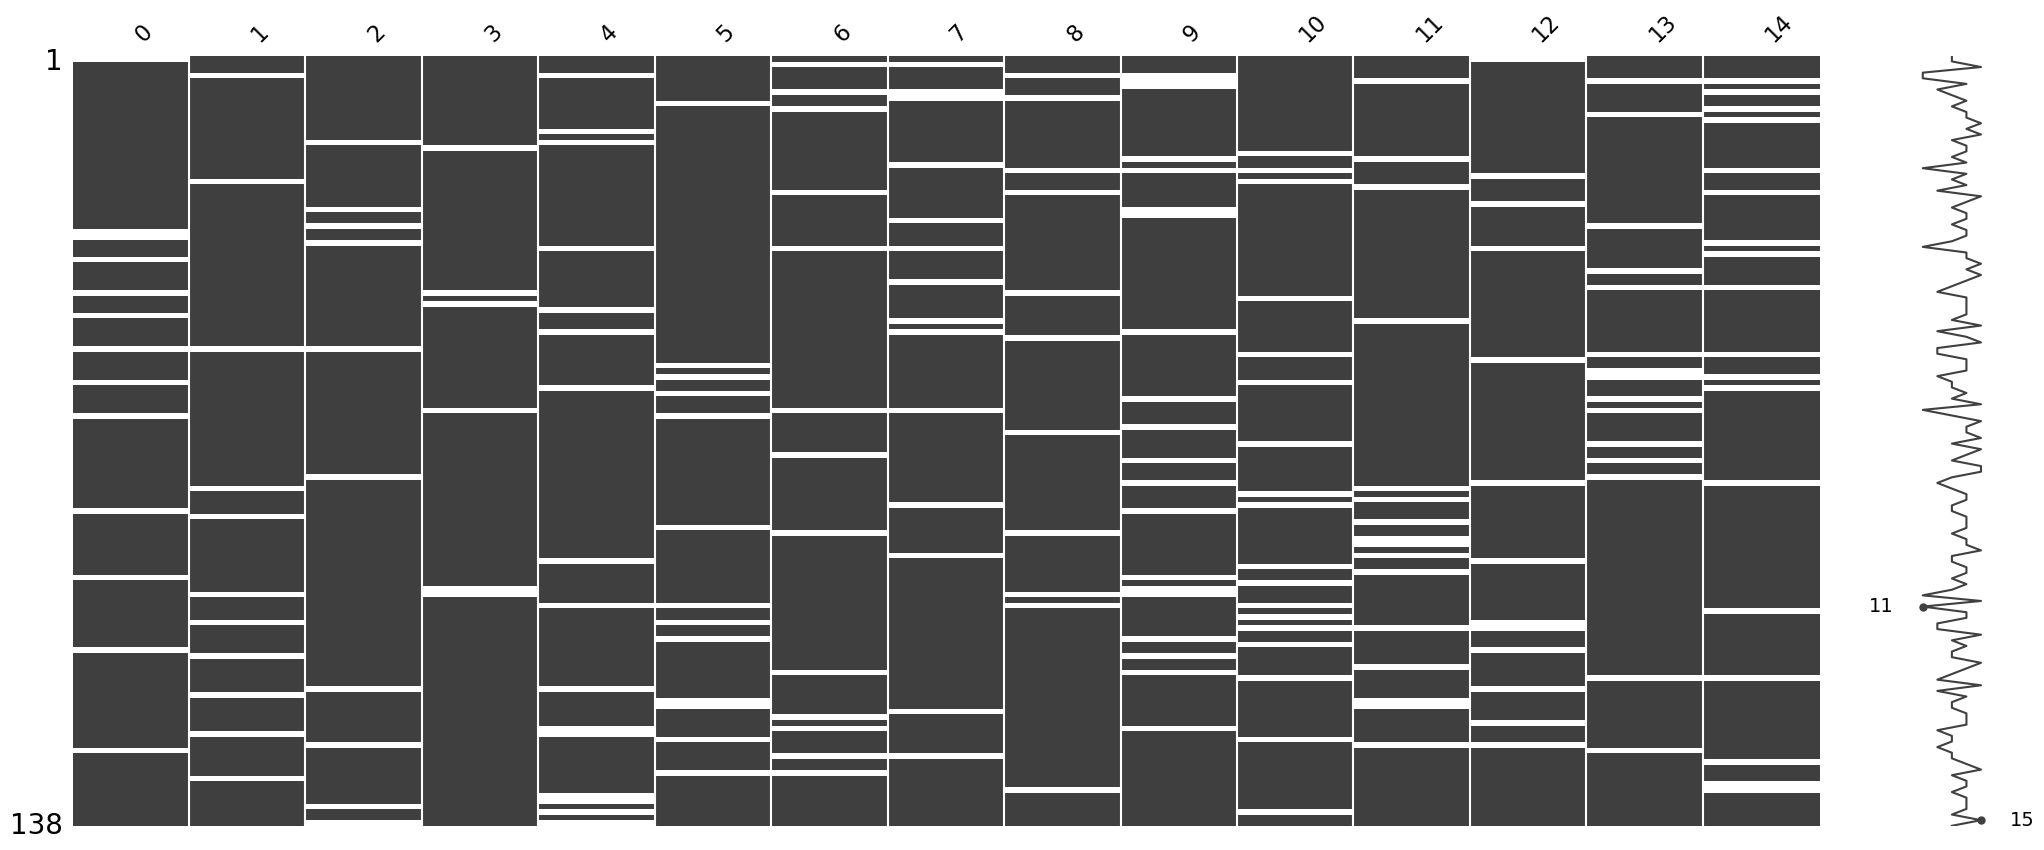

In [8]:
# 可视化缺失值
msno.matrix(test_df)

In [9]:
  #计算自变量X的填充性能RMSE 
k_values = []
X_rmse_values=[]
X_rmse_mean=[]
for k in range(1, 20,1):
    imputer = KNNImputer(n_neighbors=k, weights="uniform")
    train_filled = imputer.fit_transform(train_df)
    test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
    train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
    test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
    #mse_train = mean_squared_error(train_df_origin, train_filled)
    mse_test = mean_squared_error(test_df_origin, test_filled, multioutput='raw_values')
    mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
    #print(f'Train MSE: {mse_train}')
    print(f'k=: {k}')
    print(f'Test MSE: {mse_test}')
    print(f'Test mean MSE: {mse_mean}')
    k_values.append(k)
    X_rmse_values.append(mse_test)
    X_rmse_mean.append(mse_mean)    

k=: 1
Test MSE: [3.62318841e-02 1.29867942e+01 1.73935851e+00 1.44927536e-02
 3.03623188e+00 7.24637681e-01 1.67707935e+00 4.34782609e-02
 3.62318841e-02 3.76449275e+01 5.07246377e-02 4.34782609e-02
 5.66473913e+03 8.86344203e+05 4.34782609e-02]
Test mean MSE: 59471.13461160628
k=: 2
Test MSE: [2.53623188e-02 1.80817400e+01 1.40860389e+00 1.44927536e-02
 1.96376812e+00 5.83333333e-01 1.53847595e+00 3.07971014e-02
 2.17391304e-02 2.89474638e+01 3.98550725e-02 1.81159420e-02
 4.30080435e+03 6.51152917e+05 2.71739130e-02]
Test mean MSE: 43700.428129054955
k=: 3
Test MSE: [2.65700483e-02 1.08763928e+01 1.53261057e+00 1.44927536e-02
 1.40418680e+00 5.70853462e-01 1.65295616e+00 2.33494364e-02
 2.17391304e-02 2.83711755e+01 3.05958132e-02 1.28824477e-02
 5.46667713e+03 3.24969725e+05 1.93236715e-02]
Test mean MSE: 22032.06398033682
k=: 4
Test MSE: [2.58152174e-02 1.20978754e+01 1.00272334e+00 1.13224638e-02
 1.34556159e+00 5.26721014e-01 1.44658665e+00 1.85688406e-02
 2.12862319e-02 2.952309

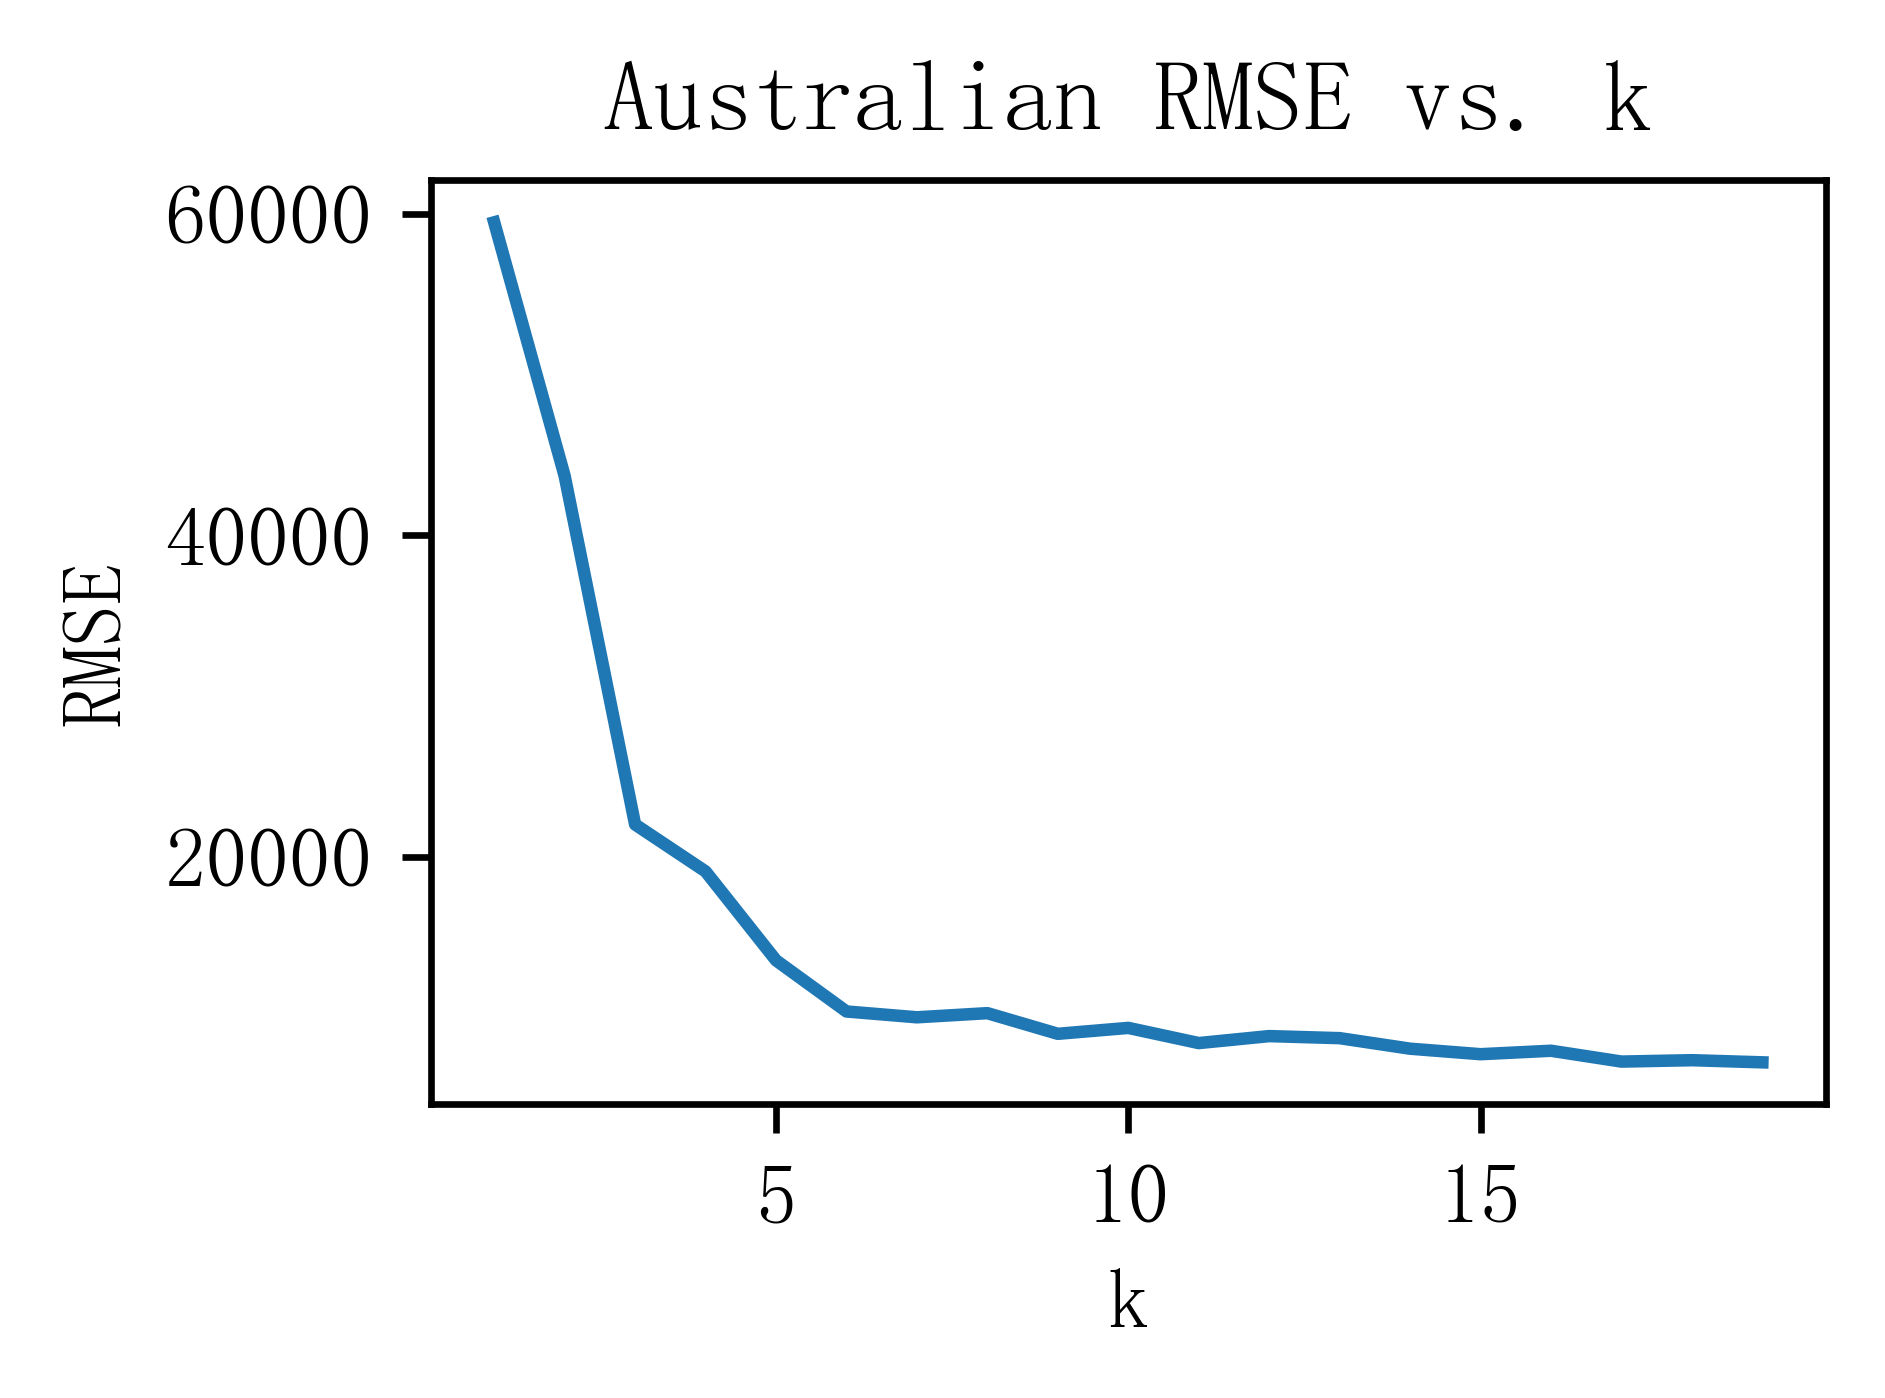

In [10]:
# 设置图像尺寸和分辨率
fig = plt.figure(figsize=(3, 2), dpi=600)

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimSun']  # 设置宋体
plt.rcParams['font.serif'] = ['Times New Roman']  # 设置新罗马
plt.rcParams['font.size'] = 10  # 设置字号为10pt

# 生成 k 值和均方根误差
#k_values = range(1, 21)
#rmse_values = np.random.rand(20) * 10  # 生成随机均方根误差

# 绘制图像
plt.plot(k_values, X_rmse_mean)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Australian RMSE vs. k')

# 保存图像
plt.savefig('Australiank_rmse_knn_RF.tiff')

In [11]:
# 首先，我们需要将这三个数组堆叠在一起以形成一个新数组
merged_array = np.column_stack((k_values, X_rmse_values, X_rmse_mean))
# 接着，我们将这个数组转换为 Pandas DataFrame
df = pd.DataFrame(merged_array)
# 最后，我们可以将这个 DataFrame 输出到 CSV 文件中
df.to_csv('australianKNN_K.csv', index=False)  #index=False 表示在输出的 CSV 文件中不包含索引列

In [13]:
# 将第一列作为X轴，其余列作为y轴
x= merged_array[:, 0]
y = merged_array[:, 1:]
# 对y按列进行规范化
column_norms = np.apply_along_axis(lambda x: np.linalg.norm(x), 0, y)
y /= column_norms

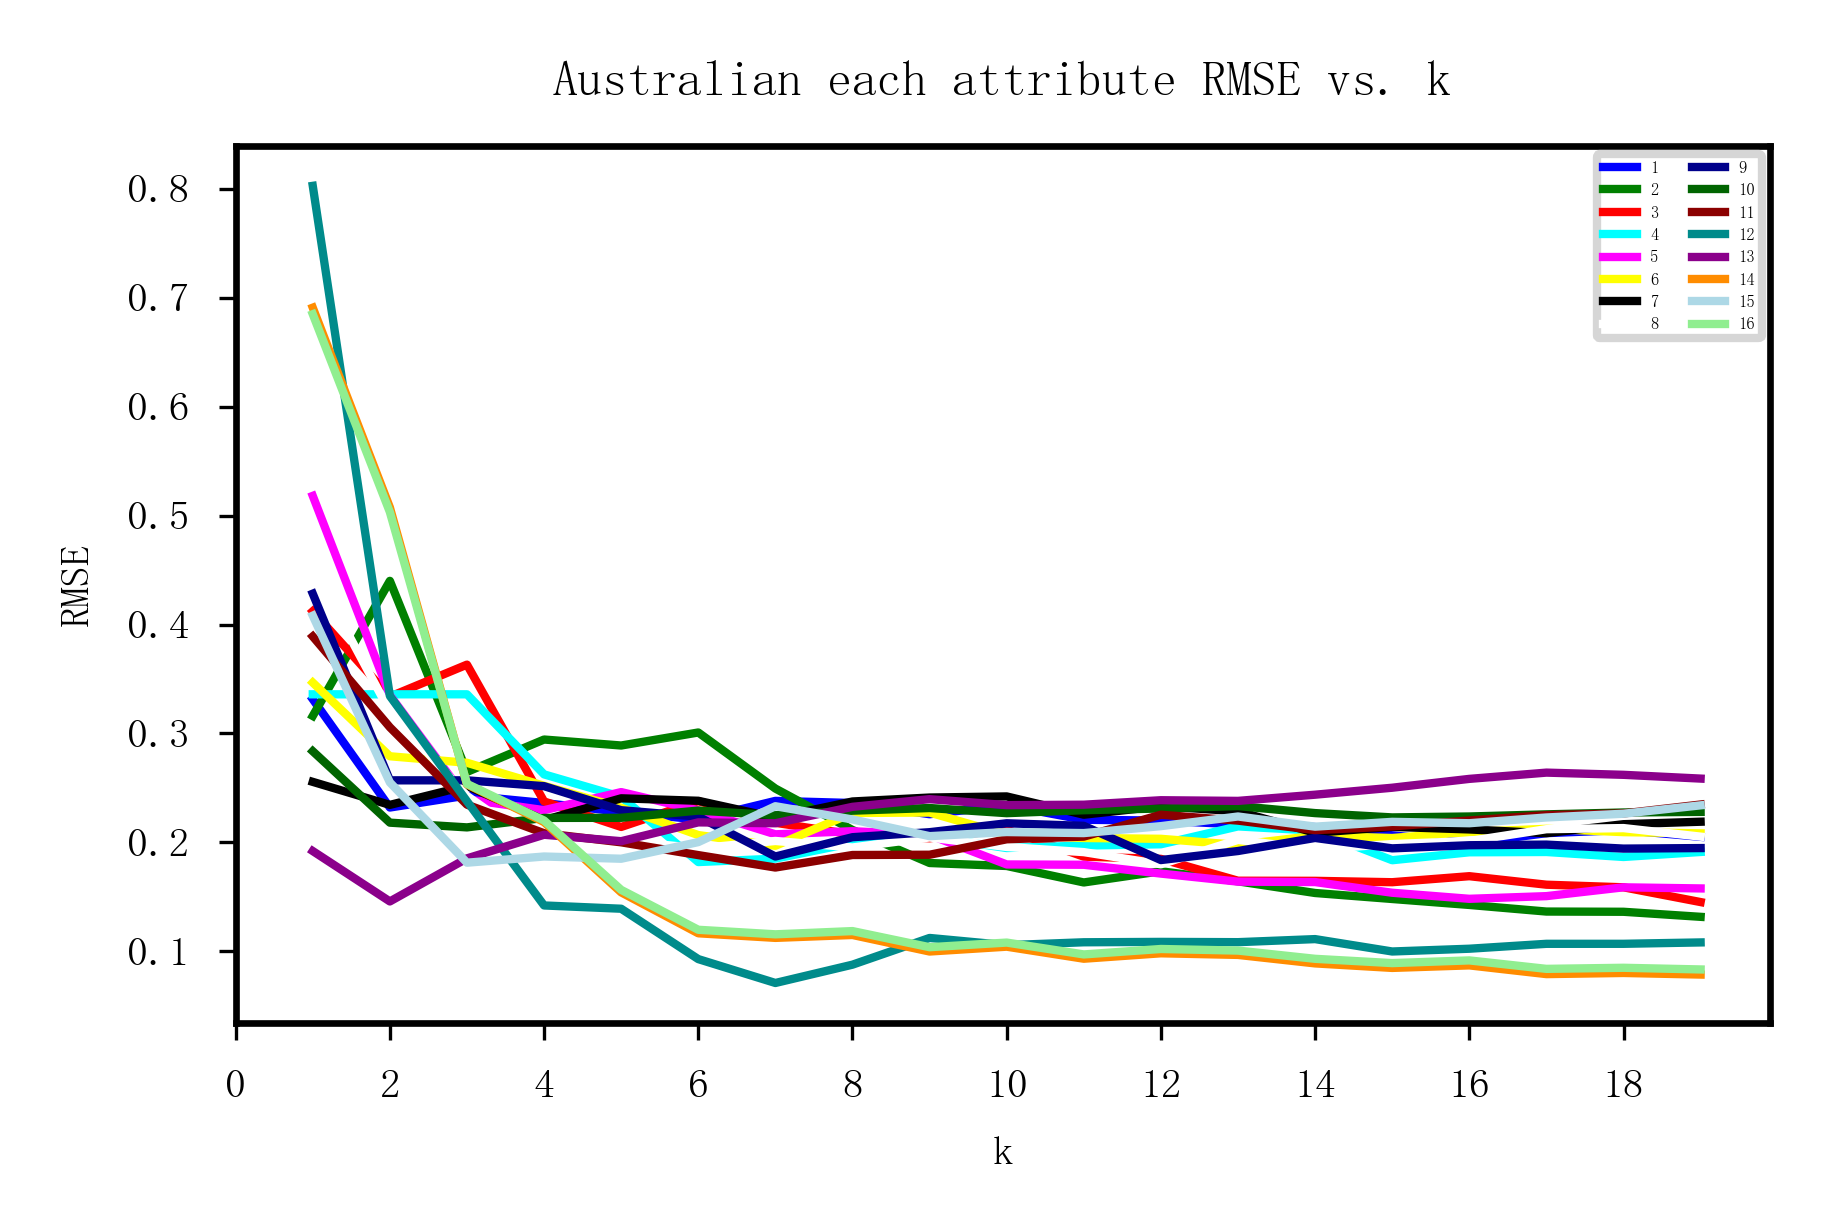

In [14]:

# 设置图像尺寸和分辨率
fig = plt.figure(figsize=(3,2), dpi=600)

# 设置字体
#plt.rcParams['font.sans-serif'] = ['SimSun']  # 设置宋体
#plt.rcParams['font.serif'] = ['Times New Roman']  # 设置新罗马
plt.rcParams['font.serif'] = ['Arial']  # 设置新罗马
plt.rcParams['font.size'] = 5  # 设置字号为10pt
plt.rcParams['lines.linewidth'] = 0.8

# 颜色列表，用于为每条线分配明显不同的颜色
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'darkblue', 'darkgreen', 'darkred', 'darkcyan', 'darkmagenta', 'darkorange',
          'lightblue', 'lightgreen', 'lightpink', 'lightcyan', 'lightskyblue', 'lightyellow','gray', 'darkgray', 'lightgray', 
          'lime', 'maroon', 'navy', 'olive', 'purple', 'silver', 'teal', 'fuchsia','aqua', 'coral', 'gold', 'khaki', 'orchid', 'plum']
# 绘制多条曲线
for i in range(y.shape[1]):
    #color = plt.cm.tab20(i)  # 使用tab20颜色循环为每条线分配不同的颜色
    color = colors[i % len(colors)]  # 使用颜色列表为每条线分配不同的颜色
    plt.plot(x, y[:, i], color=color, label=f"{i+1}",linewidth=1)

# 添加图例和标签
plt.legend(loc='upper right', fontsize=2, ncol=2)

# 设置坐标轴范围和标签
#plt.xlim([0, 20])
# 设置x轴的步长为1
plt.xticks(np.arange(0, 20, step=2))
#plt.ylim([-1, 1])
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Australian each attribute RMSE vs. k')

# 设置x轴刻度线的长短和粗细
plt.tick_params(axis='x', which='major', length=2, width=0.4)
plt.tick_params(axis='y', which='major', length=2, width=0.4)
# 调整图形边距
plt.tight_layout()
# 保存图形到文件
fig.savefig('australianeachAttributeK.tiff', dpi=600, bbox_inches='tight')
# 显示图形
plt.show()

In [ ]:
  #计算自变量X的填充性能RMSE 
k_values = []
X_rmse_values=[]
X_rmse_mean=[]

In [13]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=1, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(1)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.10470108005753434
Test MSE: [1.32775120e-01 7.15011962e-05 4.59031100e-05 2.95753589e-05
 1.37340730e-03 1.08141477e-03 1.68038577e-04 2.64355263e-04
 4.54545455e-01]
Test mean MSE: 0.06559497441520468


In [14]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(2)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.07746216708861287
Test MSE: [9.03110048e-02 5.93301435e-05 4.39742823e-05 2.57775120e-05
 7.66144587e-04 8.14282820e-04 1.21531549e-04 1.73424716e-04
 3.53169856e-01]
Test mean MSE: 0.04949836965045189


In [38]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=3, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled)
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')

Train MSE: 0.07831306160183431
Test MSE: 0.08158501618155237


In [16]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=3, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(3)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06809231947077278
Test MSE: [7.84157363e-02 5.03621744e-05 4.15337586e-05 2.19597289e-05
 8.27830841e-04 6.42987440e-04 1.04531632e-04 1.90973551e-04
 4.24774056e-01]
Test mean MSE: 0.05611888575447457


In [17]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=4, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(4)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06468102314260533
Test MSE: [6.93032297e-02 4.43107057e-05 3.82924641e-05 1.95835825e-05
 7.41743683e-04 4.97771924e-04 9.67078162e-05 1.74965946e-04
 4.39144737e-01]
Test mean MSE: 0.05667348251428761


In [18]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=5, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(5)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06223128849945127
Test MSE: [6.20574163e-02 4.35968900e-05 3.55227273e-05 1.79760766e-05
 6.29901112e-04 4.17051962e-04 9.27914234e-05 1.75929605e-04
 3.97703349e-01]
Test mean MSE: 0.05124150392743222


In [19]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=6, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(6)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06107137819057832
Test MSE: [6.02073365e-02 4.59222156e-05 3.38915470e-05 1.76908892e-05
 7.43298013e-04 4.03776922e-04 8.82730263e-05 1.60103602e-04
 3.43135300e-01]
Test mean MSE: 0.04498173256782001


In [20]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=7, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(7)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.0610201237677152
Test MSE: [5.84659701e-02 4.45171370e-05 3.48110536e-05 1.80005615e-05
 8.08591349e-04 3.55845572e-04 8.86931147e-05 1.68222439e-04
 3.22844449e-01]
Test mean MSE: 0.04253656668117805


In [21]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=8, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(8)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.060278759780109915
Test MSE: [5.75097189e-02 4.90435295e-05 3.26153185e-05 1.80136065e-05
 8.61758196e-04 3.41428089e-04 9.14980375e-05 1.58981015e-04
 3.19004187e-01]
Test mean MSE: 0.04200747147721043


In [22]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=9, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(9)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.06047711984082701
Test MSE: [5.75639435e-02 5.02322199e-05 3.33772668e-05 1.84037008e-05
 1.00821365e-03 3.58049349e-04 9.27957314e-05 1.62206373e-04
 3.21430681e-01]
Test mean MSE: 0.04230198921065758


In [23]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=10, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(10)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05943195502569091
Test MSE: [5.66626794e-02 5.06955742e-05 3.50885167e-05 1.80959928e-05
 1.13770302e-03 3.61494489e-04 9.26170514e-05 1.64638068e-04
 3.06339713e-01]
Test mean MSE: 0.040540302783758635


In [24]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=11, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(11)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05902020388354718
Test MSE: [5.64375816e-02 5.06344161e-05 3.54235043e-05 1.84405769e-05
 1.19044108e-03 3.58949734e-04 9.14094814e-05 1.65649900e-04
 3.13911187e-01]
Test mean MSE: 0.04136219077052606


In [25]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=12, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(12)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05791422624352877
Test MSE: [5.44673711e-02 5.58707968e-05 3.66037015e-05 1.89393939e-05
 1.31109519e-03 3.70302887e-04 9.57499772e-05 1.58910968e-04
 3.22559476e-01]
Test mean MSE: 0.042119368925918534


In [26]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=13, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(13)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.057280253865173214
Test MSE: [5.43232072e-02 5.98457716e-05 3.91870275e-05 1.95464455e-05
 1.37215541e-03 3.82704636e-04 9.71766814e-05 1.62134980e-04
 3.26335608e-01]
Test mean MSE: 0.04253239620256599


In [27]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=14, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(14)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05695849612188734
Test MSE: [5.36080461e-02 6.22426094e-05 4.16679890e-05 1.97664413e-05
 1.45128185e-03 3.88200920e-04 9.97003802e-05 1.68221074e-04
 3.24101650e-01]
Test mean MSE: 0.04221564195340218


In [28]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=15, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(15)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05719267807915868
Test MSE: [5.14673046e-02 6.45544923e-05 4.30914407e-05 1.99296917e-05
 1.52989238e-03 3.77393013e-04 1.00697743e-04 1.72758874e-04
 3.16363636e-01]
Test mean MSE: 0.04112658429160022


In [29]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=16, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(16)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05719036525272472
Test MSE: [5.12952303e-02 6.66723516e-05 4.60816014e-05 2.03859758e-05
 1.60313943e-03 3.82563024e-04 1.02018446e-04 1.72471639e-04
 3.13341059e-01]
Test mean MSE: 0.0407810690376732


In [30]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=17, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(17)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.057377748521681565
Test MSE: [5.27474711e-02 6.82107912e-05 4.61621082e-05 2.10298671e-05
 1.63361213e-03 3.48578578e-04 1.02009300e-04 1.75698831e-04
 3.20392046e-01]
Test mean MSE: 0.041726091018429605


In [31]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=18, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(18)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05686287313697528
Test MSE: [5.28050978e-02 7.11462210e-05 4.80469904e-05 2.11126248e-05
 1.62509393e-03 3.47643351e-04 1.02943195e-04 1.77181614e-04
 3.21611584e-01]
Test mean MSE: 0.04186776104028836


In [32]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=19, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(19)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.05678496462499132
Test MSE: [5.33704887e-02 7.29609571e-05 4.93066509e-05 2.11502969e-05
 1.62227688e-03 3.55006251e-04 1.00756653e-04 1.75329100e-04
 3.16637729e-01]
Test mean MSE: 0.04137833380688721


In [33]:
# 4. 使用KNNImputer进行数据填充
imputer = KNNImputer(n_neighbors=20, weights="uniform")
train_filled = imputer.fit_transform(train_df)
test_filled = imputer.transform(test_df)
# 将结果重新转换为数据框
train_filled = pd.DataFrame(train_filled, columns = train_df.columns)
test_filled = pd.DataFrame(test_filled, columns = test_df.columns)
# 5. 评估填充效果，即测试集的填充值与真实值的MSE（这里我们拥有原始未缺失数据test_df_origin）
#test_df_org = abalone_df_origin.loc[test_df.index] # 获取原始测试集的未缺失数据
mse_train = mean_squared_error(train_df_origin, train_filled)
mse_test = mean_squared_error(test_df_origin, test_filled,multioutput='raw_values')
mse_mean = np.mean(mse_test)
 #计算填充性能RMSE 
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Test mean MSE: {mse_mean}')
k_values.append(20)
X_rmse_values.append(mse_test)
X_rmse_mean.append(mse_mean)

Train MSE: 0.057057323430401756
Test MSE: [5.35885167e-02 7.40106908e-05 4.91404755e-05 2.12204695e-05
 1.69571874e-03 3.62779800e-04 1.03519430e-04 1.81412894e-04
 3.14342105e-01]
Test mean MSE: 0.041157602723036285
